# Проведение исследований со случайным лесом

In [51]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing


In [52]:
# Шаг 1: Загружаем данные
data = fetch_california_housing(as_frame=True)
housing_data = data['data']
housing_target = data['target']

# Для классификации создаём категории цен
housing_target_class = pd.cut(housing_target, bins=3, labels=["1", "2", "3"])

# Добавляем категориальный столбец в DataFrame
housing_data['PriceCategory'] = housing_target_class

# Выводим первые 5 строк
print("Данные о недвижимости:")
print(housing_data.head())


Данные о недвижимости:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude PriceCategory  
0    -122.23             3  
1    -122.22             3  
2    -122.24             3  
3    -122.25             3  
4    -122.25             3  


In [53]:
# Шаг 2: Разделение данных на обучающую и тестовую выборки

# Для задачи классификации
X_class = housing_data.drop(columns=['PriceCategory'])
y_class = housing_data['PriceCategory']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Для задачи регрессии
X_reg = housing_data.drop(columns=['PriceCategory'])
y_reg = housing_target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [54]:
# Нормализация данных
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


## Базовая модель случайного леса для классификации

In [55]:
# Базовая модель случайного леса для классификации
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class_scaled, y_train_class)

# Оценка качества классификации
y_pred_class = rf_classifier.predict(X_test_class_scaled)
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
print(f"Классификация: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}")


Классификация: Accuracy = 0.8319, F1 = 0.8304


## Базовая модель случайного леса для регрессии

In [56]:
# Базовая модель случайного леса для регрессии
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg_scaled, y_train_reg)

# Оценка качества регрессии
y_pred_reg = rf_regressor.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Регрессия: MSE = {mse:.4f}")


Регрессия: MSE = 0.2553


## Оптимизация гиперпараметров для случайного леса

In [57]:
# Оптимизация гиперпараметров для классификации
param_grid_class = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_class = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_class, scoring='f1_weighted', cv=5)
grid_class.fit(X_train_class_scaled, y_train_class)

# Лучшие параметры
best_rf_classifier = grid_class.best_estimator_
print(f"Лучшие параметры для классификации: {grid_class.best_params_}")

# Оценка оптимизированной модели
y_pred_class_opt = best_rf_classifier.predict(X_test_class_scaled)
accuracy_opt = accuracy_score(y_test_class, y_pred_class_opt)
f1_opt = f1_score(y_test_class, y_pred_class_opt, average='weighted')
print(f"Оптимизированная классификация: Accuracy = {accuracy_opt:.4f}, F1 = {f1_opt:.4f}")

# Оптимизация гиперпараметров для регрессии
param_grid_reg = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_reg, scoring='neg_mean_squared_error', cv=5)
grid_reg.fit(X_train_reg_scaled, y_train_reg)

# Лучшие параметры
best_rf_regressor = grid_reg.best_estimator_
print(f"Лучшие параметры для регрессии: {grid_reg.best_params_}")

# Оценка оптимизированной модели
y_pred_reg_opt = best_rf_regressor.predict(X_test_reg_scaled)
mse_opt = mean_squared_error(y_test_reg, y_pred_reg_opt)
print(f"Оптимизированная регрессия: MSE = {mse_opt:.4f}")


Лучшие параметры для классификации: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Оптимизированная классификация: Accuracy = 0.8333, F1 = 0.8320
Лучшие параметры для регрессии: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Оптимизированная регрессия: MSE = 0.2552


## Реализация случайного леса вручную

In [50]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

class CustomRandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth

    def fit(self, X, y):
        self.trees = []
        # Преобразуем X и y в pandas DataFrame/Series
        X, y = pd.DataFrame(X), pd.Series(y)
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            bootstrap_X, bootstrap_y = self._bootstrap(X, y)
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)

    def fit_reg(self, X, y):
        self.trees = []
        # Преобразуем X и y в pandas DataFrame/Series
        X, y = pd.DataFrame(X), pd.Series(y)
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            bootstrap_X, bootstrap_y = self._bootstrap(X, y)
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)

    def _bootstrap(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        return X.iloc[indices], y.iloc[indices]  # Теперь можно использовать iloc

    def predict(self, X, classification=True):
        tree_preds = np.zeros((X.shape[0], self.n_estimators))
        for i, tree in enumerate(self.trees):
            tree_preds[:, i] = tree.predict(X)
        if classification:
            return [np.bincount(tree_preds[i, :].astype(int)).argmax() for i in range(tree_preds.shape[0])]
        else:
            return np.mean(tree_preds, axis=1)

# Пример использования кастомного случайного леса для классификации
custom_rf_classifier = CustomRandomForest(n_estimators=100, max_depth=20)
custom_rf_classifier.fit(X_train_class_scaled, y_train_class)
y_pred_class_custom = custom_rf_classifier.predict(X_test_class_scaled)
y_pred_manual_cls = np.where(y_pred_class_custom, 4, 0)

manual_accuracy = accuracy_score(y_test_class, y_pred_manual_cls)
accuracy_custom = accuracy_score(y_test_class, y_pred_class_custom)
print(f"Кастомная классификация: Accuracy = {accuracy_custom:.4f}")

# Пример использования кастомного случайного леса для регрессии
custom_rf_regressor = CustomRandomForest(n_estimators=100, max_depth=20)
custom_rf_regressor.fit_reg(X_train_reg_scaled, y_train_reg)
y_pred_reg_custom = custom_rf_regressor.predict(X_test_reg_scaled, classification=False)
mse_custom = mean_squared_error(y_test_reg, y_pred_reg_custom)
print(f"Кастомная регрессия: MSE = {mse_custom:.4f}")


Кастомная классификация: Accuracy = 0.0000
Кастомная регрессия: MSE = 0.2536


## Визуализация

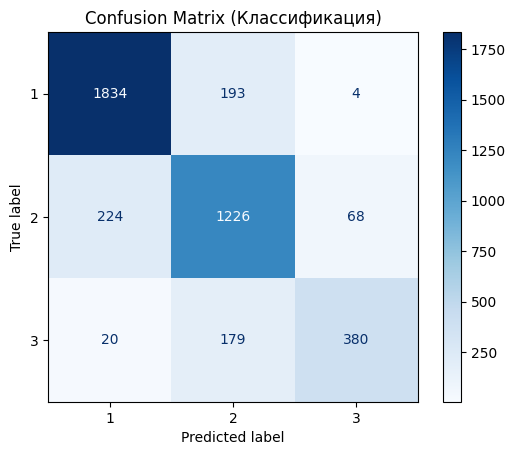

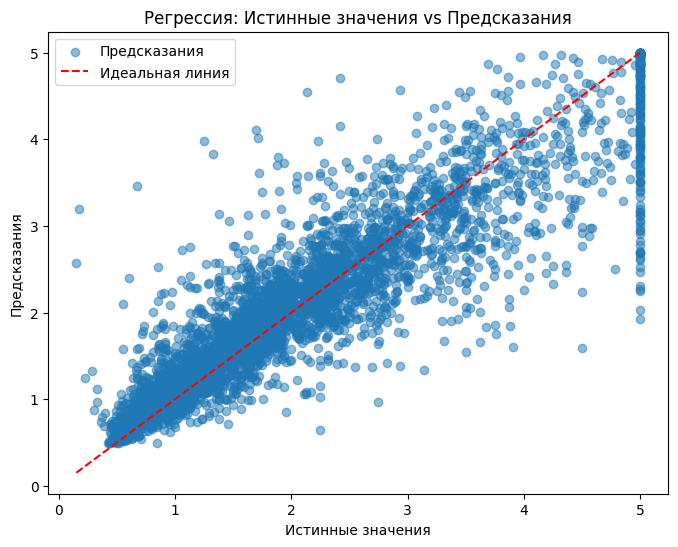

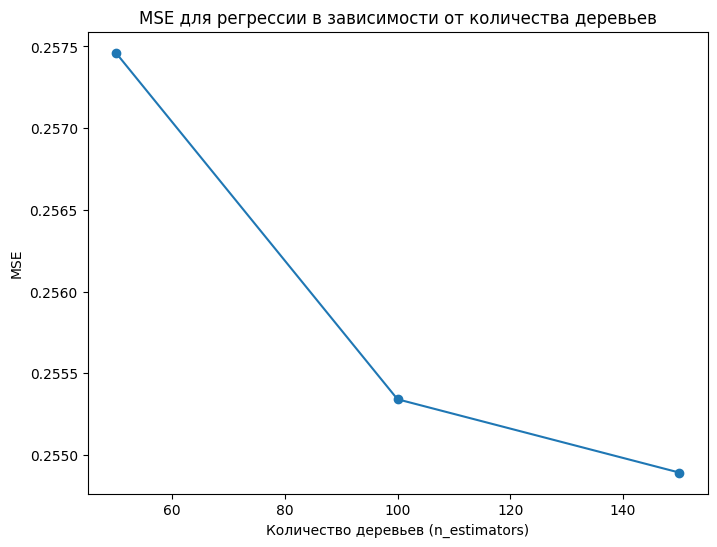

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Классификация: Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class_opt, labels=grid_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Классификация)")
plt.show()

# Регрессия: График предсказаний vs Истинные значения
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_opt, alpha=0.5, label="Предсказания")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', label="Идеальная линия")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.title("Регрессия: Истинные значения vs Предсказания")
plt.legend()
plt.show()

# Оценка качества модели по числу деревьев в случайном лесе
n_estimators_values = [50, 100, 150]
mse_scores = []
for n in n_estimators_values:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_regressor.fit(X_train_reg_scaled, y_train_reg)
    y_pred = rf_regressor.predict(X_test_reg_scaled)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, mse_scores, marker='o')
plt.xlabel("Количество деревьев (n_estimators)")
plt.ylabel("MSE")
plt.title("MSE для регрессии в зависимости от количества деревьев")
plt.show()
